Install retina-face library to detect face and opencv-python to put lines on images.

In [1]:
# %pip install retina-face tf-keras opencv-python matplotlib

In [2]:
import cv2
import retinaface
from matplotlib import pyplot as plt
from retinaface import RetinaFace

(np.float64(-0.5), np.float64(99.5), np.float64(132.5), np.float64(-0.5))

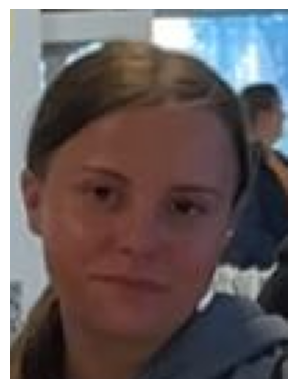

In [3]:
image = cv2.imread("./images/ewa.png", cv2.IMREAD_COLOR_RGB)
plt.imshow(image, "coolwarm")
plt.axis("off")

In [4]:
img_faces = retinaface.RetinaFace.detect_faces(image)

#Iterate all objects key areas
for i in img_faces.keys():
  choose = img_faces[i]
  print(choose)

{'score': np.float64(0.9951761960983276), 'facial_area': [np.int64(13), np.int64(40), np.int64(71), np.int64(117)], 'landmarks': {'right_eye': [np.float32(33.44164), np.float32(66.539185)], 'left_eye': [np.float32(60.959866), np.float32(70.1406)], 'nose': [np.float32(48.35758), np.float32(85.279366)], 'mouth_right': [np.float32(32.038807), np.float32(96.62606)], 'mouth_left': [np.float32(54.355675), np.float32(99.513596)]}}


In [5]:
#Iterate all objects key areas and mark only face area
for i in img_faces.keys():
  facial_parts = img_faces[i]
  recognize_face_area = facial_parts["facial_area"]
  cv2.rectangle(image, (recognize_face_area[2], recognize_face_area[3]), (recognize_face_area[0], recognize_face_area[1]), (255, 255, 255), 1)

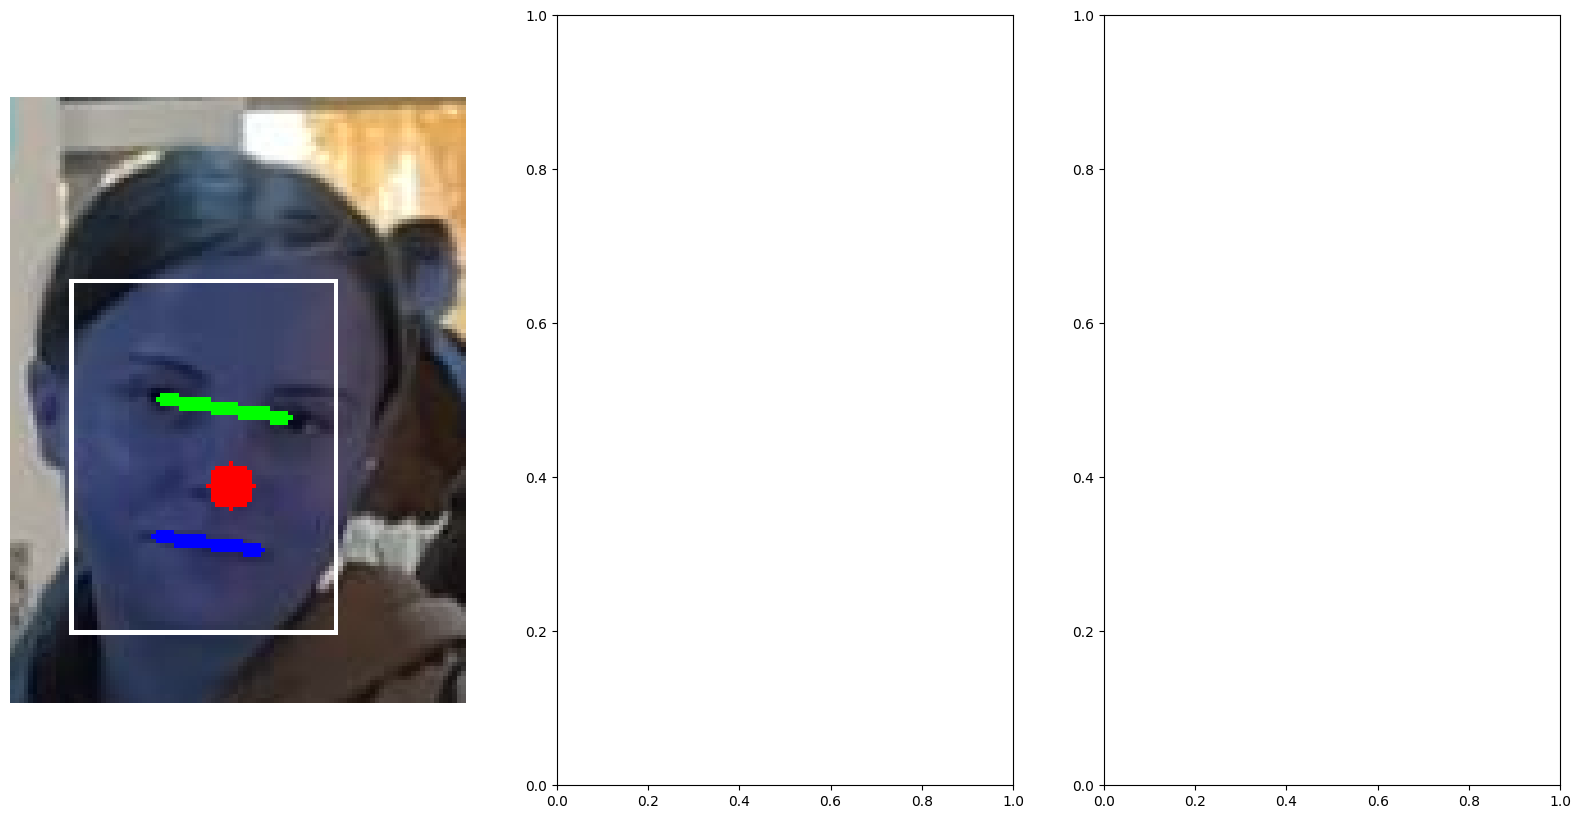

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

for index, i in enumerate(img_faces.keys()):
    facial_parts = img_faces[i]
    landmarks = facial_parts["landmarks"]
    right_eye = tuple(map(int, landmarks["right_eye"]))
    left_eye = tuple(map(int, landmarks["left_eye"]))
    nose = tuple(map(int, landmarks["nose"]))
    mouth_right = tuple(map(int, landmarks["mouth_right"]))
    mouth_left = tuple(map(int, landmarks["mouth_left"]))

    cv2.line(image, right_eye, left_eye, (0, 255, 0), 2)

    cv2.line(image, mouth_right, mouth_left, (255, 0, 0), 2)

    cv2.circle(image, nose, 5, (0, 0, 255), -1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes[index].imshow(image)
    axes[index].axis("off")

    # cv2.imshow("Face with landmarks", image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

    cv2.imwrite("face_with_landmarks.jpg", image)

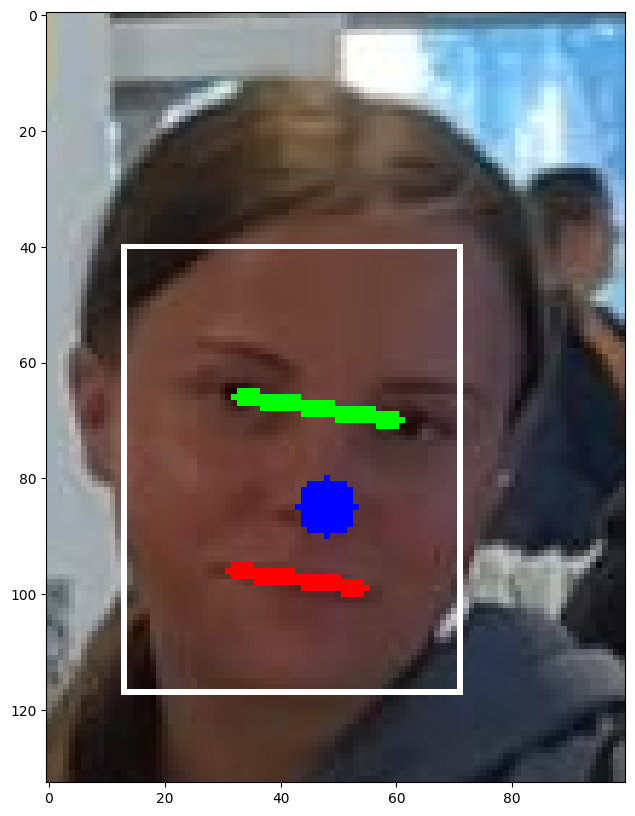

In [7]:
#Diplay Face Area
plt.figure(figsize= (10, 10))
plt.imshow(image[:, :, ::-1])
plt.show()

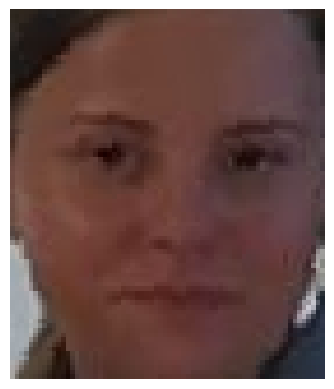

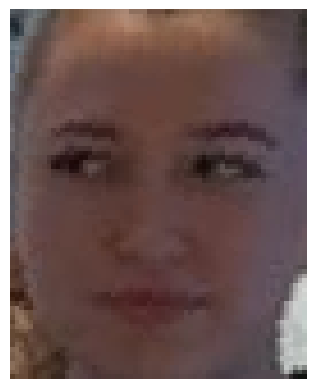

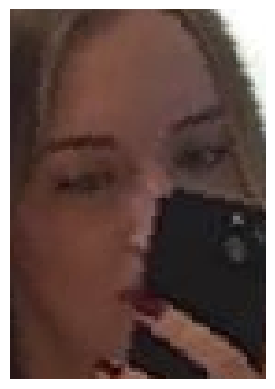

In [11]:
#Extract individual faces from the image
ext_faces = retinaface.RetinaFace.extract_faces(img_path = "./images/3_faces.png", align = True)

for face in ext_faces:
  plt.imshow(face)
  plt.axis("off")
  plt.show()